# Tujuan dari pemodelan kali ini adalah memprediksi sebuah SMS apakah SPAM atau BUKAN SPAM

## Sumber Dataset yang digunakan :
### `Rahmi, F. and Wibisono, Y.  (2016). Aplikasi SMS Spam Filtering pada Android menggunakan Naive Bayes, Unpublished manuscript`

## Unduh terlebih dahulu tools untuk NLTK

In [25]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fitra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fitra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Import tools untuk NLTK

In [26]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

sw_indo = stopwords.words("indonesian") + list(punctuation)

## Import Data

In [27]:
import pandas as pd
df = pd.read_excel('D:\LAPTOP LAWAS\project flask\TA - SMS CLASSIFIER\dataset\spam.xlsx')

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['spam.csv']))

In [20]:
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,1
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,1
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",1
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",1
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,1


## Dataset Spliting

In [28]:
from sklearn.model_selection import train_test_split

X = df.Teks
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((914,), (229,), (914,), (229,))

## Preprocessing

In [29]:
# pip install jcopml
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer


pipeline = Pipeline([
    ('prep', TfidfVectorizer(tokenizer=word_tokenize, stop_words=sw_indo)),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))

    ])

Metode yang berbeda diterapkan pada data yang tidak terstruktur, dimana tidak ada data numerik. Sehingga, pipa numerik tidak dibuat. Sebagai gantinya dibuat pipa untuk `Tfidf`, yaitu adalah pembobotan yang digunakan untuk kalimat. Disini jenis kalimat adalah Indonesia, karena telah kita buat mengguakan `sw_indo`

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

model = RandomizedSearchCV(pipeline, rsp.logreg_params, cv=3, n_jobs=-1, verbose=1, n_iter=50)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

## Evaluasi Model

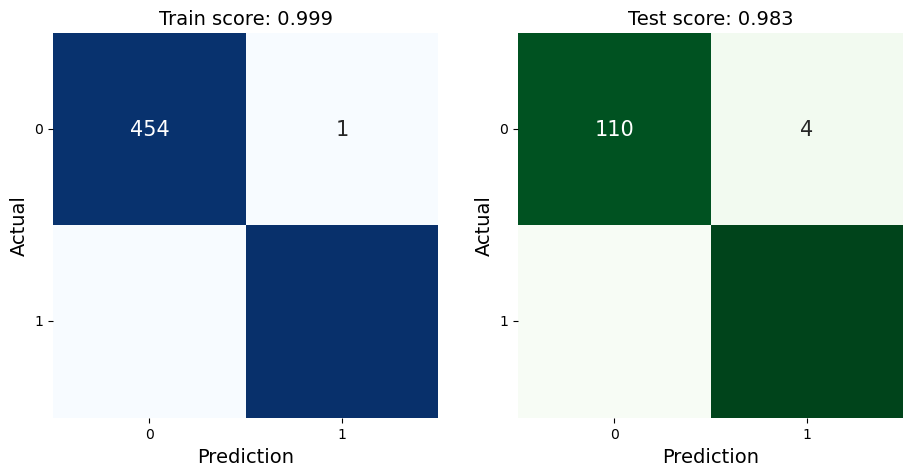

In [14]:
from jcopml.plot import plot_confusion_matrix

plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

Model memprediksi mana sms yang spam dan mana yang tidak secara baik

In [15]:
import pickle

# Simpan model ke file pkl
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


## Contoh Prediksi

In [ ]:
text1 = ["VIP IFLIX - MAXstream telah aktif hingga 03/03/2021 utk nonton Magic Hour, The Flash, K-Drama. Login dg nomor hp **903447 di http://bit.ly/tselXiflix. CS: support+IDiflix.com / 188"]

model.predict(text1), model.predict_proba(text1)

(array([1]), array([[0.14081308, 0.85918692]]))

Pada text1, model memprediksi dengan benar jika pesan tersebut adalah `SPAM (1)`. Dengan perbandingan probabilitas adalah `86% SPAM, dan 14% BUKAN SPAM`

In [ ]:
text2 = ["jadi saya tidak bisa absen pak, apakah boleh absen manual pak ?"]

model.predict(text2), model.predict_proba(text2)

(array([0]), array([[0.63194307, 0.36805693]]))

Pada text2, model memprediksi dengan benar jika pesan tersebut adalah `BUKAN SPAM (0)`. Dengan perbandingan probabilitas adalah `37% SPAM, dan 63% BUKAN SPAM`